In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np
from scipy.stats import t

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [3]:
math = pd.read_csv('stud_math.csv')

# Ниже представлены изменения, которые раскроются в дальнейшем. Они здесь для удобства (чтобы не искать по всему документу)
#math = math.loc[math.age <= 21]
#math = math.loc[math.Fedu != 40]
#math = math.loc[math.famrel != -1]

#b = {22, 25, 54, 385, 26, 56, 24, 212, 21, 75, 30, 38, 40, 23, 28}
#for i in b:
#    math = math.loc[math.absences != i]

#list_object = list()
#for col in math.columns:
#    if math.loc[:, col].dtype == 'O':
#        list_object.append(col)

# Выделим колонки с номинативными значения в отдельный список
#list_object = list()
#for col in math.columns:
#    if math.loc[:, col].dtype == 'O':
#        list_object.append(col)
#list_object

#math = math.loc[math.score != 0]

#math = math.replace({'Medu' : {0 : 'no', 1 : 'initial', 2 : 'notfullaver', 3 : 'fullaver', 4 : 'high'}})
#math = math.replace({'Fedu' : {0 : 'no', 1 : 'initial', 2 : 'notfullaver', 3 : 'fullaver', 4 : 'high'}})
#math = math.replace({'traveltime' : {1 : 'near', 2 : 'further', 3 : 'far', 4 : 'longway' }})

In [4]:
#1. Первичная обработка данных (включает анализ распределения признака для числовых данных, оценку уникальных значения для номинативных данных, выводы и тд.)

#Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

display(math.head(10))
math.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               338 non-null    object 
 1   sex                  338 non-null    object 
 2   age                  338 non-null    int64  
 3   address              322 non-null    object 
 4   famsize              316 non-null    object 
 5   Pstatus              304 non-null    object 
 6   Medu                 336 non-null    float64
 7   Fedu                 318 non-null    float64
 8   Mjob                 323 non-null    object 
 9   Fjob                 307 non-null    object 
 10  reason               323 non-null    object 
 11  guardian             310 non-null    object 
 12  traveltime           315 non-null    float64
 13  studytime            331 non-null    float64
 14  failures             321 non-null    float64
 15  schoolsup            329 non-null    obj

In [8]:
# Теперь рассмотрим все столбцы по отдельности

# 1.1 school

# 1.1.1 Уникальные значения

math.school.value_counts()



GP    349
MS     46
Name: school, dtype: int64

In [22]:
# 1.2 sex

# 1.2.1 Уникальные значения

math.sex.value_counts()



F    193
M    182
Name: sex, dtype: int64

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

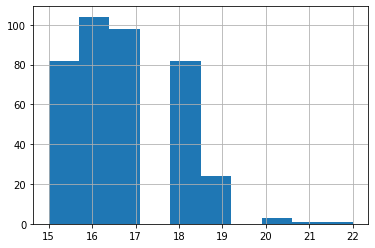

In [17]:
# 1.3 age
# 1.3.1 Анализ распределения
math.age.hist()
math.age.describe()

# Распределение возраста без аномалий в интервале от 15 до 17ти лет (здравый смысл и опыт подсказывает, что это нормальный возраст для школьника).
# Вопрос выызвает наличие школьников от 18ти (не включая) и старше. Это либо выбросы(для этого проведем оценку),
# либо второгодники (выявить причину в условиях жизни),
# либо особенности какого-либо общего признака (образовательная система какой-страны)

In [70]:
# 1.3.2 Проверка на выбросы и отчистка дынных.

IQR = math.age.quantile(0.75) - math.age.quantile(0.25)
perc25 = math.age.quantile(0.25)
perc75 = math.age.quantile(0.75)

print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

# Как мы видим, данные с возрастом более 21 года являются выбросом.

math = math.loc[math.age <= 21]

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


In [22]:
# 1.4 address (тип адреса ученика ('U' - городской, 'R' - за городом))

# 1.4.1 Уникальные значения

math.address.value_counts()


U    294
R     83
Name: address, dtype: int64

In [27]:
# 1.5 famsize (Размер семьи ('LE3' <= 3, 'GT3' >3))

# 1.5.1 Уникальные значения

math.famsize.value_counts()

# Много многодетных семей. Традиционный характер отношений.

GT3    260
LE3    107
Name: famsize, dtype: int64

In [24]:
# 1.6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

# 1.6.1 Уникальные значения

math.Pstatus.value_counts()

# 1.6.2 Вывод: Два уникальных значения, пустых значений (NaN): 394 - (313 + 36) = 45.
# Процент разводов гораздо меньше, чем классических семей. Еще одно подтверждение традиционного характера населения.

T    313
A     36
Name: Pstatus, dtype: int64

high           131
notfullaver    100
fullaver        96
initial         59
no               3
Name: Medu, dtype: int64

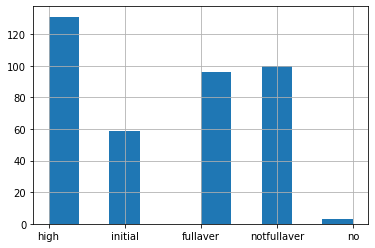

In [4]:
# 1.7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

# 1.7.1 Анализ распределения

math.Medu.hist()

# Большой процент матерей имеют высшее образование, что данные в целом говорят о достаточном уровне развития населения.

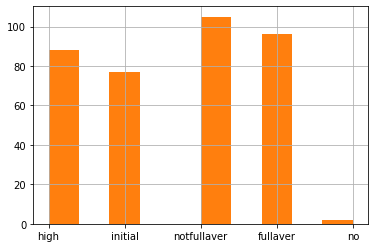

In [8]:
# 1.8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

# 1.8.1 Анализ распределения

math.Fedu.hist()

# Обнаружен выброс "40". Давайте исключим его и снова проанализируем столбец

math = math.loc[math.Fedu != 40]

# В целом, процент мужчин без высшего образования больше чем у женщин. 
# Возможные причины:
# 1. Большой процент ранних браков (большое количество детей на семью). Мужчина идет работать до получения образования
# 2. Рабочая профессия приносит денег больше
# 3. Менталитет



In [77]:
# 1.9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
# 1.9.1 Уникальные значения
math.Mjob.value_counts()

# Если проссумировать health, teacher, serveces, то это вполне коллериует с количеством матерей с высшим образованием.

other       133
services     96
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

In [78]:
# 1.10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения,
# 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

# 1.10.1 Уникальные значения

math.Fjob.value_counts()

# 1.10.2 Вывод: Пять уникальных значений, пустых значений (NaN): 393 - 357 = 36.
# Большой процент в other вкупе с большим процентов отцов без высшего образования говорит о вынужденном выборе отцов рабочей профессии

other       196
services    101
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

In [79]:
# 1.11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы,
# 'course' - образовательная программа, 'other' - другое)

# 1.11.1 Уникальные значения

math.reason.value_counts()

course        137
home          104
reputation    102
other          33
Name: reason, dtype: int64

In [80]:
# 1.12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

# 1.12.1 Уникальные значения

math.guardian.value_counts()


mother    249
father     85
other      28
Name: guardian, dtype: int64

In [82]:
# 1.14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

# 1.14.1 Уникальные значения

math.studytime.value_counts()

2.0    194
1.0    102
3.0     63
4.0     27
Name: studytime, dtype: int64

In [83]:
# 1.15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

# 1.15.1 Уникальные значения

math.failures.value_counts()

0.0    292
1.0     49
2.0     16
3.0     14
Name: failures, dtype: int64

In [85]:
# 1.16 schoolsup — дополнительная образовательная поддержка (yes или no)

# 1.16.1 Уникальные значения

math.schoolsup.value_counts()

no     333
yes     51
Name: schoolsup, dtype: int64

In [86]:
# 1.17 famsup — семейная образовательная поддержка (yes или no)

# 1.17.1 Уникальные значения

math.famsup.value_counts()

yes    218
no     136
Name: famsup, dtype: int64

In [87]:
# 1.18 paid — дополнительные платные занятия по математике (yes или no)

# 1.18.1 Уникальные значения

math.paid.value_counts()

no     198
yes    155
Name: paid, dtype: int64

In [89]:
# 1.19 activities — дополнительные внеучебные занятия (yes или no)

# 1.19.1 Уникальные значения

math.activities.value_counts()

yes    194
no     185
Name: activities, dtype: int64

In [90]:
# 1.20 nursery — посещал детский сад (yes или no)

# 1.20.1 Уникальные значения

math.nursery.value_counts()

yes    299
no      78
Name: nursery, dtype: int64

In [91]:
# 1.21 higher — хочет получить высшее образование (yes или no)

# 1.21.1 Уникальные значения

math.higher.value_counts()

yes    355
no      18
Name: higher, dtype: int64

In [92]:
# 1.22 internet — наличие интернета дома (yes или no)

# 1.22.1 Уникальные значения

math.internet.value_counts()

yes    303
no      56
Name: internet, dtype: int64

In [94]:
# 1.23 romantic — в романтических отношениях (yes или no)

# 1.23.1 Уникальные значения

math.romantic.value_counts()

no     239
yes    123
Name: romantic, dtype: int64

In [95]:
# 1.24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

# 1.24.1 Уникальные значения

math.famrel.value_counts()

 4.0    182
 5.0     97
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [99]:
# Обнаружен выброс "-1". Давайте исключим его

math = math.loc[math.famrel != -1]

In [105]:
# 1.25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

# 1.25.1 Уникальные значения

math.freetime.value_counts()


3.0    153
4.0    111
2.0     61
5.0     38
1.0     18
Name: freetime, dtype: int64

In [106]:
# 1.26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

# 1.26.1 Уникальные значения

math.goout.value_counts()


3.0    127
2.0     99
4.0     84
5.0     51
1.0     23
Name: goout, dtype: int64

In [108]:
# 1.27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

# 1.27.1 Уникальные значения

math.health.value_counts()

5.0    137
3.0     89
4.0     62
1.0     46
2.0     43
Name: health, dtype: int64

In [80]:
# 1.28 absences — количество пропущенных занятий

# 1.28.1 Уникальные значения

math.absences.value_counts()

math.absences.describe()

# 1.28.2 Проверка на выбросы и отчистка дынных.

IQR = math.absences.quantile(0.75) - math.absences.quantile(0.25)
perc25 = math.absences.quantile(0.25)
perc75 = math.absences.quantile(0.75)

print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

# Исключим из выбросы (больше 20)

b = {22, 25, 54, 385, 26, 56, 24, 212, 21, 75, 30, 38, 40, 23, 28}
for i in b:
    math = math.loc[math.absences != i]


# 1.28.2 Вывод: 5 уникальных значений, пустых значений (NaN): 392 - 377 = 15

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


count    332.000000
mean      58.102410
std       16.001748
min       25.000000
25%       50.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

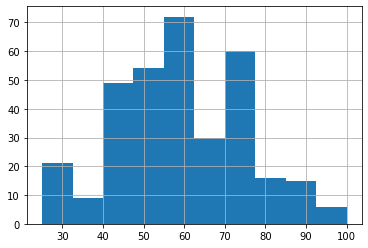

In [34]:
# 1.29 score — баллы по госэкзамену по математике

# 1.29.1 Уникальные значения

# math.absences.value_counts()
math.score.hist()
math.score.describe()

In [43]:
# 1.29.2 Проверка на выбросы и отчистка данных.

IQR = math.score.quantile(0.75) - math.score.quantile(0.25)
perc25 = math.score.quantile(0.25)
perc75 = math.score.quantile(0.75)

print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

# Выбросов нет, распределение близкое к нормальному.

# Разберемся с нулями к колонке score

a = math.loc[math.score == 0]
a

# После изучения таблицы сделаем несколько выводов:
# 1. Значение score равно '0' и соответствующее ему значение absences так же равно "0", что мало похоже на правду.
# 2. Распределение признаков в массиве (skore = 0) примерно повторяет отношение распределения (визуальный осмотр) признаков основного массива, что
# позволяет сделать вывод об отсутствии особого признака отвечающего за score = 0. 
# 3. Значения score = 0 противоречат почти нормальному распределению score (что тоже мало похоже на правду)
# На основании этих пунктов мы можем удалить все строки содирежищие score = 0

math = math.loc[math.score != 0]

math.score.describe()

# так как score это целевая величина, то для корректного построения модели необходимо удалисть все строки со NaN

math = math.dropna(subset=['score'], axis=0)

25-й перцентиль: 50.0, 75-й перцентиль: 70.0, IQR: 20.0,  Границы выбросов: [20.0, 100.0].


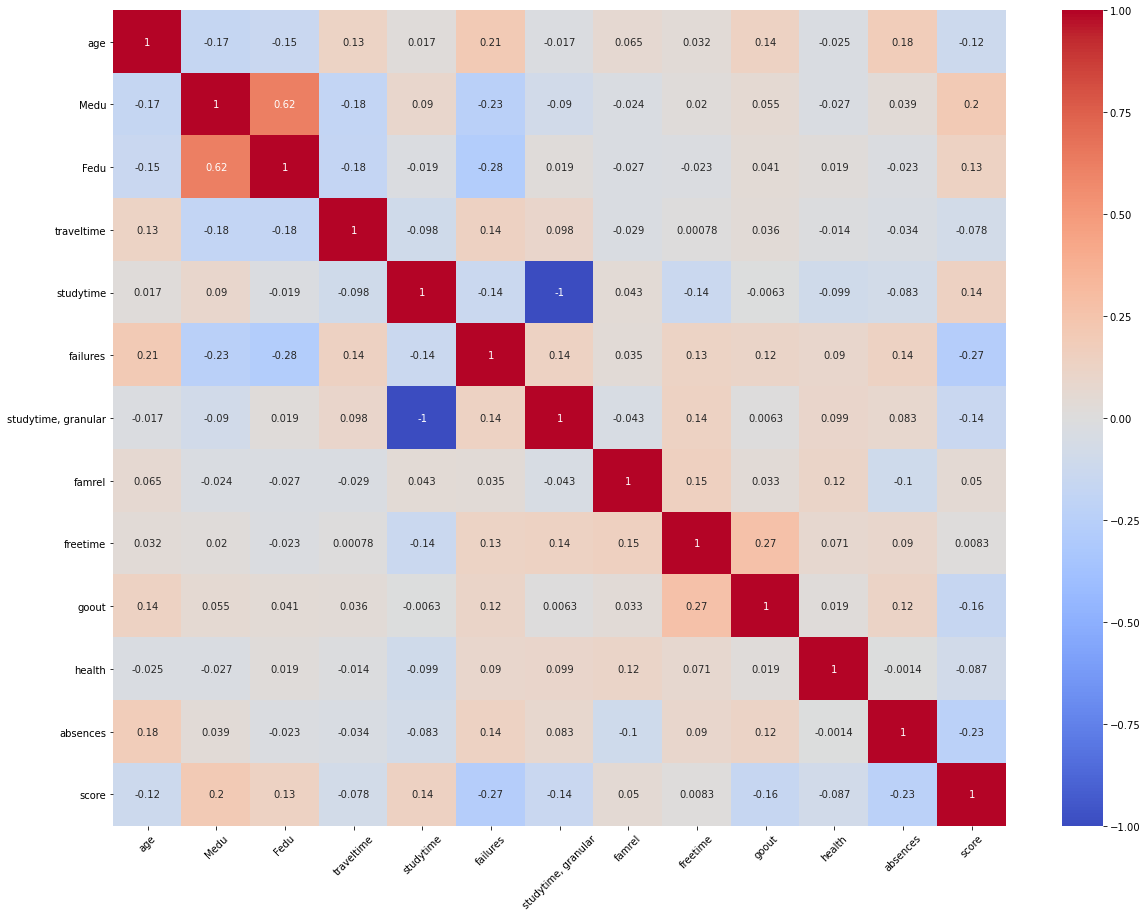

In [7]:
# 2 Корреляционный анализ для числовых значений

correlation = math.corr()
plt.subplots(figsize=(20, 15))
plt.xticks(rotation=45)
sns.heatmap(correlation, annot=True, cmap='coolwarm')


In [ ]:
# 2.1 Анализ наличия статистически значимых коэффициентов
# Для того, чтобы отобрать правильные столбцы с числовыми признаками воспользуемся формулой нахождения значимости коэффициента корреляции, 
# a полученное значение сравним со значением Стьюдента (Tst) для коэффициента даверия 0.05 и n = 332. Не будем учитывать ,что для разным признаков
# будет разное количество значения n (за счет наличия NaN), так как это вносит незначительные измененния в итоговый коэффициент.

Tst = t.ppf(0.95, 332)

j = -1
for i in correlation.score:
    P = 332**0.5 / (1 - i**2)*i
    j += 1
    if abs(P) > x:
        print('коэффициента корреляции для ',
              correlation.columns[j], ' статистически значим.')
    else:
        print('коэффициента корреляции для ',
              correlation.columns[j], ' статистически не значим.')
        
# Коэффециент коррелляции межде Fedu и Medu достаточно высок для того, чтобы принимать только один для модели
# В итоге, для последующих операций оставляем: age, Medu, studytime , failures, goout , absences

In [98]:
# 3 Анализ номинативных значений

# Выделим колонки с номинативными значения в отдельный список
list_object = list()
for col in math.columns:
    if math.loc[:, col].dtype == 'O':
        col = str(col)
        list_object.append(col)

school
sex
address
famsize
Pstatus
Mjob
Fjob
reason
guardian
schoolsup
famsup
paid
activities
nursery
higher
internet
romantic


In [46]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(3, 4))
    sns.boxplot(x=math[column], y='score', data=math)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

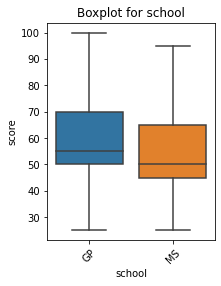

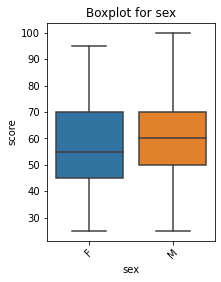

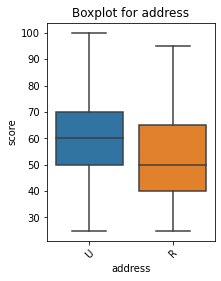

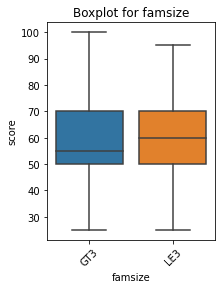

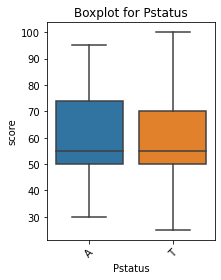

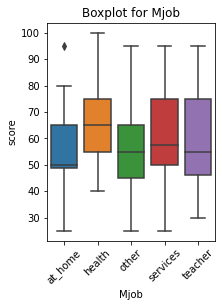

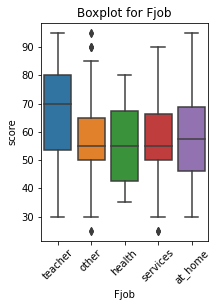

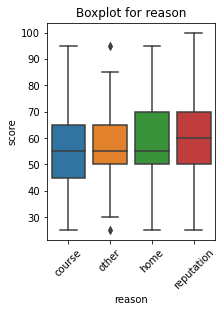

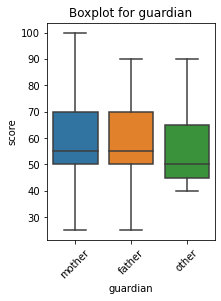

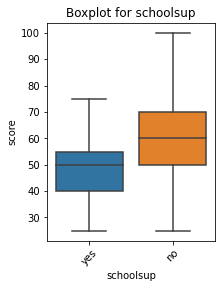

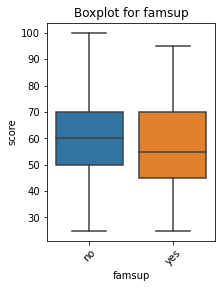

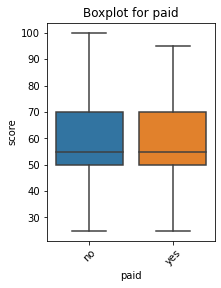

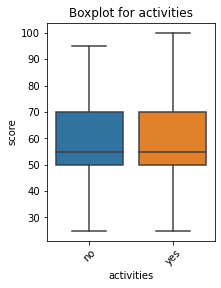

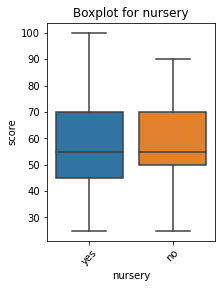

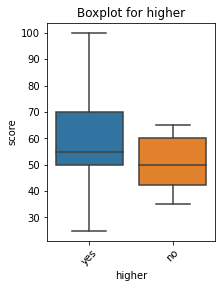

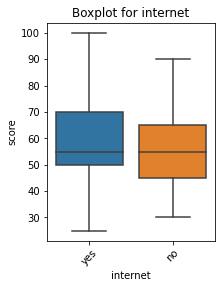

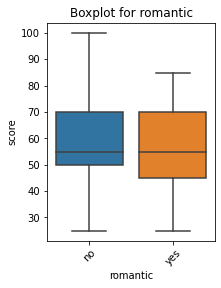

In [47]:
for col in list_object:
    get_boxplot(col)

In [48]:
# Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика.
# Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента.
# Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам неразличимы:

def get_stat_dif(column):
    cols = math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math.loc[math.loc[:, column] == comb[0], 'score'].dropna(),
                     math.loc[math.loc[:, column] == comb[1], 'score'].dropna()).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [50]:
for col in list_object:
    get_stat_dif(col)

# Как мы видим, серьёзно отличаются четыре параметра: sex,  address и  Mjob, schoolsup.
# Оставим эти переменные в датасете для дальнейшего построения модели            

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки schoolsup


In [53]:
# 4 Выводы
#    Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку,
#    это: age, Medu, studytime , failures, goout , absences , sex,  address и  Mjob, schoolsup.

math_for_model = math.loc[:, ['age', 'Medu', 'studytime', 'failures',
                              'goout', 'absences', 'sex', 'address', 'Mjob', 'schoolsup']]
math_for_model.describe()

,age,Medu,studytime,failures,goout,absences
count,332.000000,330.000000,325.000000,315.00000,326.000000,322.000000
mean,16.584337,2.796970,2.058462,0.24127,3.088957,5.062112
std,1.207527,1.104559,0.849635,0.63763,1.081907,4.964910
min,15.000000,0.000000,1.000000,0.00000,1.000000,0.000000
25%,16.000000,2.000000,1.000000,0.00000,2.000000,2.000000
50%,16.500000,3.000000,2.000000,0.00000,3.000000,4.000000
75%,17.000000,4.000000,2.000000,0.00000,4.000000,8.000000
max,21.000000,4.000000,4.000000,3.00000,5.000000,20.000000


In [ ]:
# Итак, в результате EDA для анализа влияния условий жизни учеников на их успеваемость по математике были получены следующие выводы:
# 1. В данных достаточно мало пустых значений.
# 2. Выбросы найдены в малом количестве в некоторых столбах, однако их оказалось достаточно в целевом score. Их наличие в таком количестве говоритч о том, что данные недостаточно чистые.
# 3. Анализ корреляционных коэффициентов:
#     3.1 Обратная к. между age и score, намекает на падение заинтересованности с возрастом (плюс прямая к. между age и absences). Возможно это из за снижения контроля со стороны родителей
#     3.2 Обратная к. между failures и score говорит о немалом влиянии психологического настроя ученика на его успеваемость.
#     3.3 Score/Medu/Fedu (1/0.21/0.127) вкупе с предыдущим выводом (п. 1.8) намекает на большую роль матери в обучении ребенка.
#     3.4 Более высокое значение средних коэффициентов к. "психологических" параметров (age, failures, Medu) в сравнении с "временными" (studitime, goout)
#         намекает на большее влияние собственного настроя ученика на учебу.
# 4. Вопросы к номинативным значениям
#     4.1 Подозрительным кажется обратная обратная зависимость межде schoolsup и score (здравый смысл говорит о другом). Не может ли это быть ощибкой (вопрос к ментору)?
#     4.2 Вопрос к ментору: Почему при явной графической зависимости (higher и internet) они не оказались статистически значимыми? При этом другие величины, 
#         даже при меньшем графическом отличии, оказались значимыми.  
# 5. Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это 'age', 'Medu', 'studytime', 'failures',
                             # 'goout', 'absences', 'sex', 'address', 'Mjob', 'schoolsup'.